<a href="https://colab.research.google.com/github/nidhi8917/Customer_Churn/blob/main/Customer_churn_details.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents
1. [Introduction](#introduction)
2. [Import Libraries](#Import)
3. [Data Health Review:](#review)


## Business Objective:<a name="introduction"></a>
  The Telecom Co. needs assistance in performing some quantitative analysis on the provided dataset and generate some relevant insights. This should guide the Company to first understand what factors are potentially causing churn and by taking what actions can the churn be minimized.<br>
Main objective here is to analyze churn customers’ behavior and develop strategies to increase customer retention.

## Problem Statement:<a name="introduction"></a>
 Customers’ churn is a considerable concern in service sectors with high competitive services. On the other hand, predicting the customers who are likely to leave the company will represent a potentially large additional revenue source if it is done in the early phase.

We have to find if the customer is likely to do stop the telecom services. And what are the reason resulting the customers to stop the services? Create a machine learning model to predict if the customers will leave.
## Approach:<a name="introduction"></a>
 While we will eventually build a classification model to predict likelihood of customer churn, we must first take a deep dive into the Exploratory Data Analysis (EDA) process to get a better understanding of our data.


## Import Libraries<a name="Import"></a>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

## Data Overview<a name="review"></a>

In [80]:
#reading particular excel file which contains our data
single_df = pd.read_excel("/content/Customer Churn Case Study Data.xlsx",sheet_name="Data")

In [81]:
#top 6 rows of data
#single_df.head(6)

In [82]:
#Converting excel to csv file
single_df.to_csv ("churn.csv", 
                  index = None,
                  header=True)

In [83]:
#Load the data
df1 = pd.DataFrame(pd.read_csv("churn.csv"))

In [84]:
df1.head()

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,0


In [85]:
print('There are', (df1.shape[0]), 'rows of data in this dataset')
print('There are', (df1.shape[1]), 'columns in this dataset')


There are 3333 rows of data in this dataset
There are 11 columns in this dataset


In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   weeks_active   3333 non-null   int64  
 1   conrenew_flag  3333 non-null   int64  
 2   dataplan_flag  3333 non-null   int64  
 3   data_usage     3333 non-null   float64
 4   num_cs_calls   3333 non-null   int64  
 5   avg_talk_time  3333 non-null   float64
 6   avg_calls      3333 non-null   int64  
 7   mth_bill       3333 non-null   float64
 8   overagefee     3333 non-null   float64
 9   roam_mins      3333 non-null   float64
 10  churn_flag     3333 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [87]:
#unique values in every column
print(df1.nunique())

weeks_active      212
conrenew_flag       2
dataplan_flag       2
data_usage        174
num_cs_calls       10
avg_talk_time    1667
avg_calls         119
mth_bill          627
overagefee       1024
roam_mins         162
churn_flag          2
dtype: int64




1.   There is no Missing data
2.   There are three binary(ContractRenewal,DataPlan,Churn), three 
integer variables(ActiveWeeks,num_cs_calls, averageCalls) and five float variables present in the data.




In [88]:
df1.isna().sum()

weeks_active     0
conrenew_flag    0
dataplan_flag    0
data_usage       0
num_cs_calls     0
avg_talk_time    0
avg_calls        0
mth_bill         0
overagefee       0
roam_mins        0
churn_flag       0
dtype: int64

There is no null value in the data

In [89]:
df1.describe(percentiles=[0.25,0.50,0.75,0.90,0.95]).round(2).transpose()

,count,mean,std,min,25%,50%,75%,90%,95%,max
weeks_active,3333.0,101.06,39.82,1.0,74.00,101.00,127.00,152.00,167.00,243.00
conrenew_flag,3333.0,0.90,0.30,0.0,1.00,1.00,1.00,1.00,1.00,1.00
dataplan_flag,3333.0,0.28,0.45,0.0,0.00,0.00,1.00,1.00,1.00,1.00
data_usage,3333.0,0.82,1.27,0.0,0.00,0.00,1.78,3.05,3.46,5.40
num_cs_calls,3333.0,1.56,1.32,0.0,1.00,1.00,2.00,3.00,4.00,9.00
avg_talk_time,3333.0,179.78,54.47,0.0,143.70,179.40,216.40,249.58,270.74,350.80
avg_calls,3333.0,100.44,20.07,0.0,87.00,101.00,114.00,126.00,133.00,165.00
mth_bill,3333.0,56.31,16.43,14.0,45.00,53.50,66.20,80.50,87.80,111.30
overagefee,3333.0,10.05,2.54,0.0,8.33,10.07,11.77,13.29,14.22,18.19
roam_mins,3333.0,10.24,2.79,0.0,8.50,10.30,12.10,13.70,14.70,20.00


The maximum active term is approx 5 years(243 weeks), but most of the people spend ~2 years in an account.<br>
Mostly customers data usage is 0.82 GB and 179 minutes over 100 seperate calls monthly.<br>
Highest monthl bill is 111.30 but the average monthly bill is approx 56.<br>
Maximum average fee in last 12 months is 18.19.<br>
Maximum number of call to customer service is 9 but we dont know when its been done.we can predict churn if the calls are recent but not if they are old.

Exploratory Data Analysis

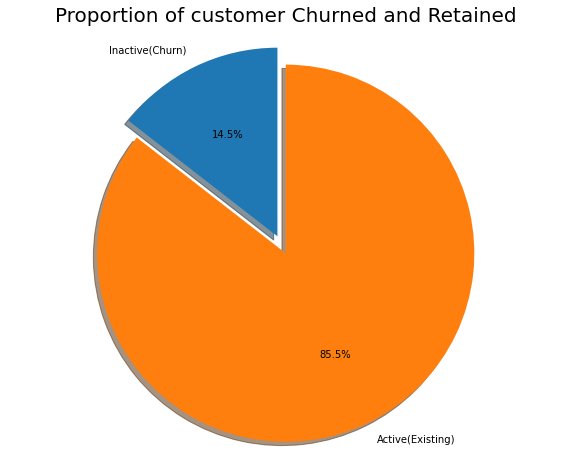

In [90]:
labels = 'Inactive(Churn)', 'Active(Existing)'
sizes = [df1.churn_flag[df1['churn_flag']==1].count(), df1.churn_flag[df1['churn_flag']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer Churned and Retained", size = 20)
plt.show()



In [91]:
label_ratio=df1['churn_flag'].value_counts()
Churn_rate =np.round((label_ratio/df1.shape[0])*100,1)
print(Churn_rate)
print('There are {} churn and {} current customers'.format(label_ratio[1], label_ratio[0]))

0    85.5
1    14.5
Name: churn_flag, dtype: float64
There are 483 churn and 2850 current customers


Churn is a highly imbalanced classification problem with lots of customers not churning and a very few churners. So here the dataset is imbalanced but in the ratio of 1:6 which is moderaly imbalanced but not very high.

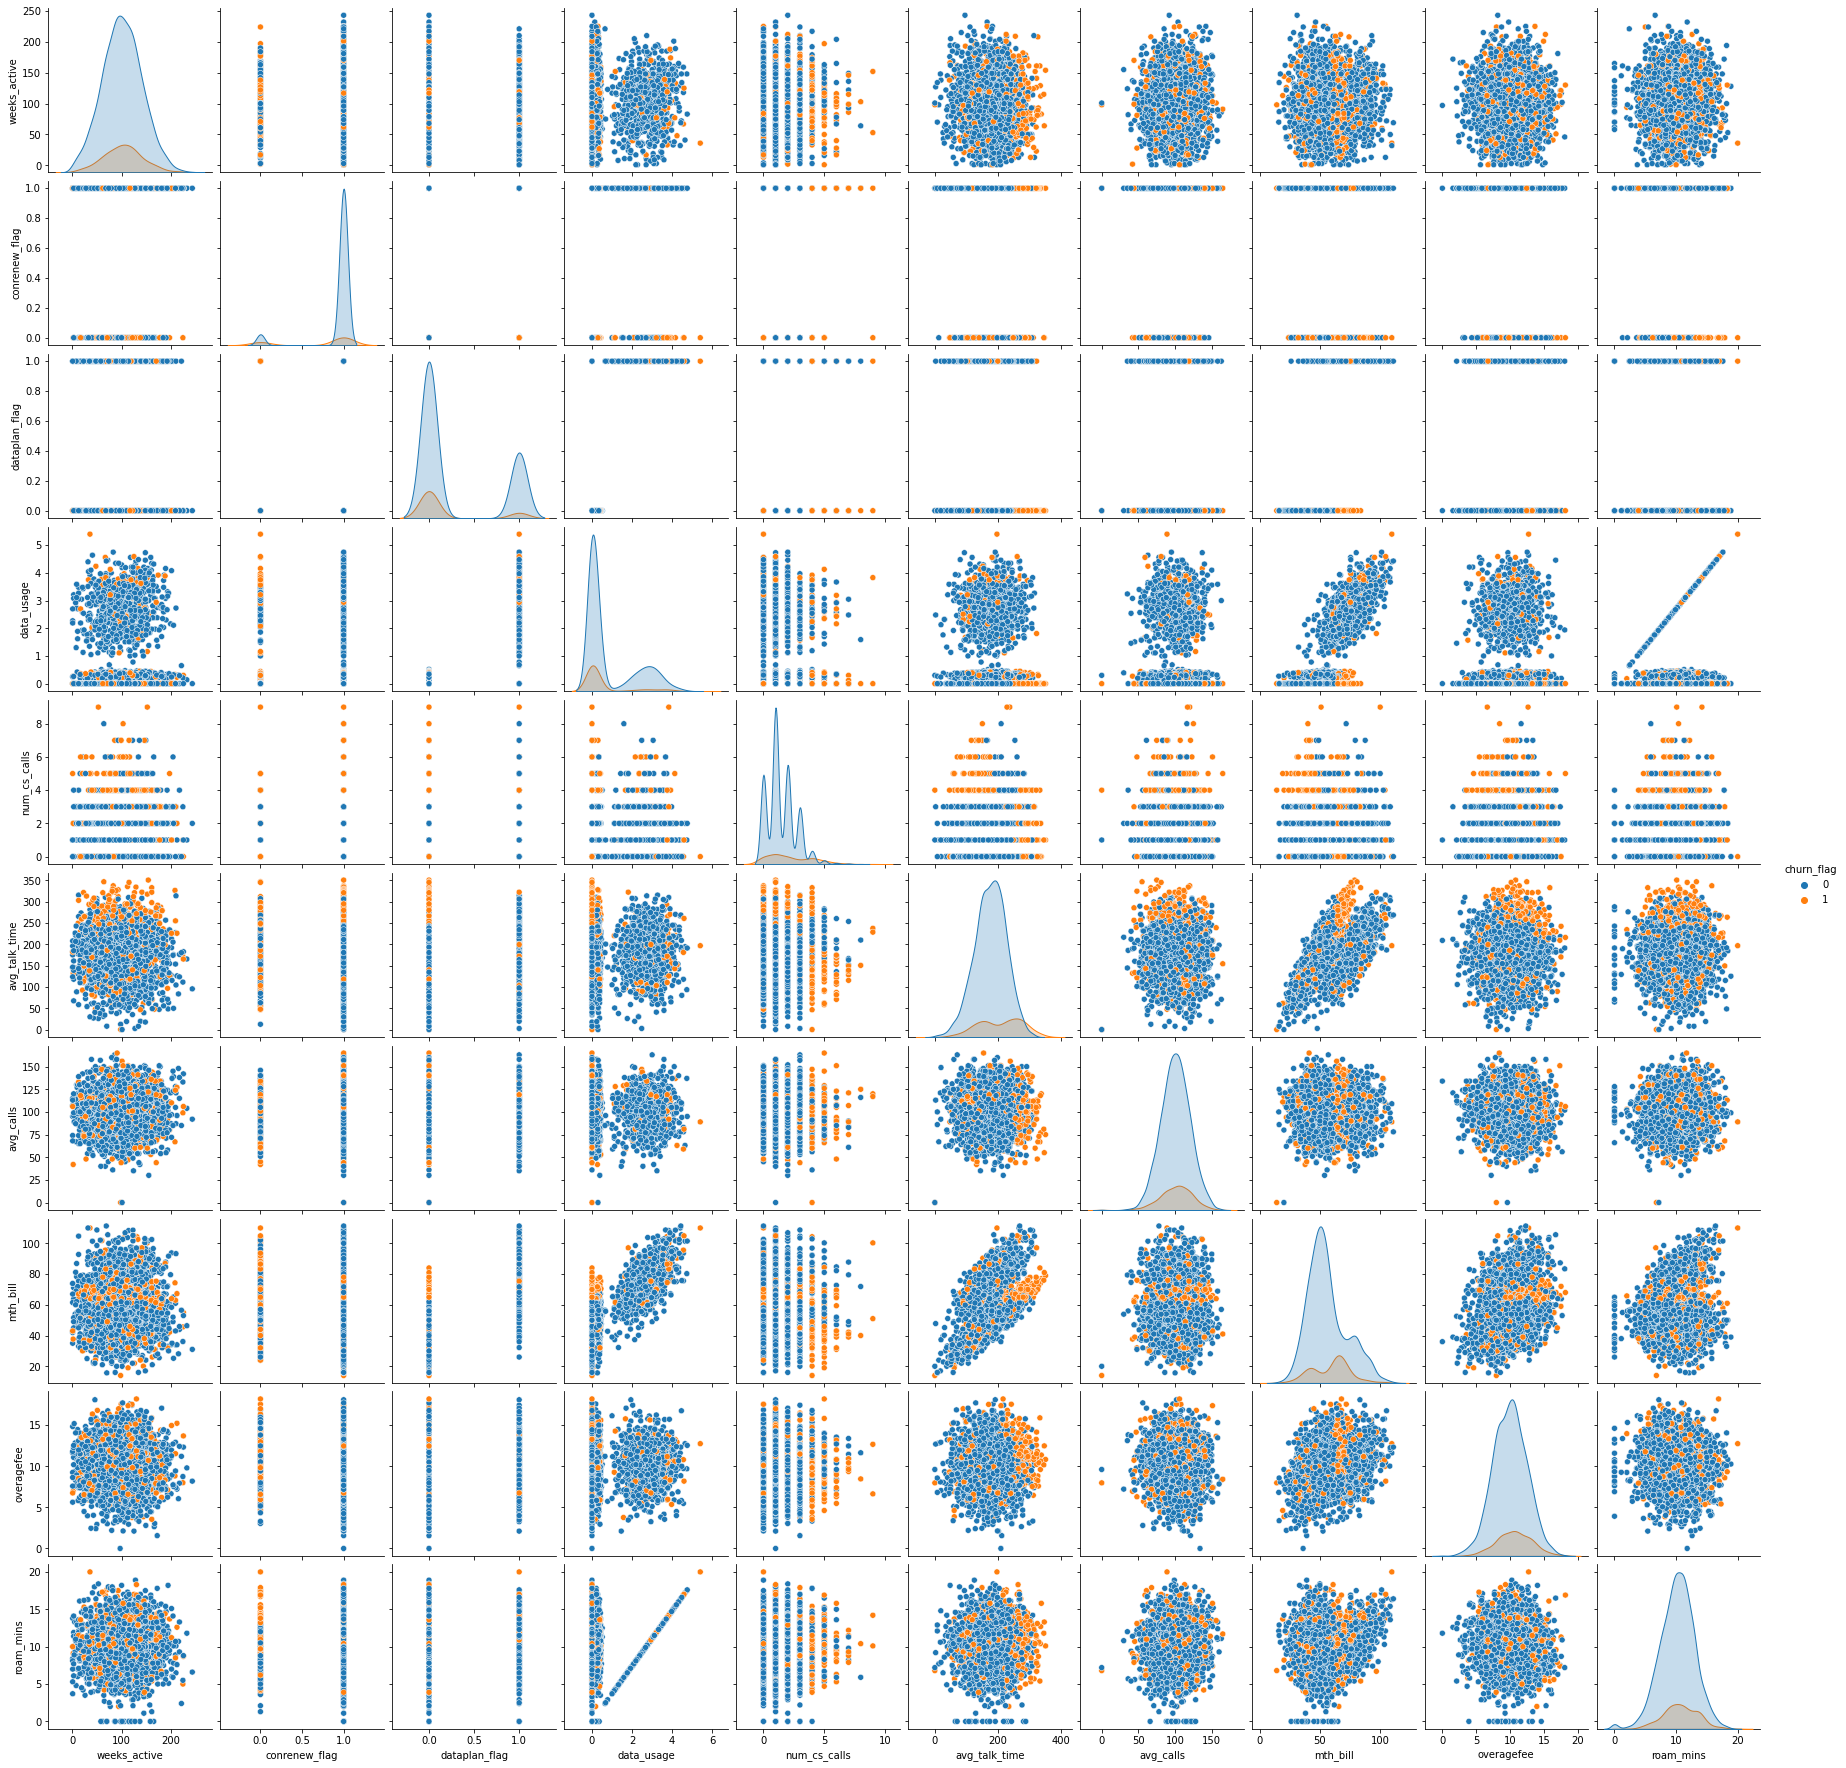

In [92]:
sns.pairplot(df1, hue="churn_flag")



1.Data usage has linear relationship between roam_mins.<br>
2.data_usage is highly skewed ith lots of zero.There are lots of customers who are not using data.<br>
3.When number of customer care calls(num_cs_calls) are of value more than 3,4 they are mostly churn. <br>
4.monthly charges(mth_bill) has positive relationship with data_usage and avg_talk_time.




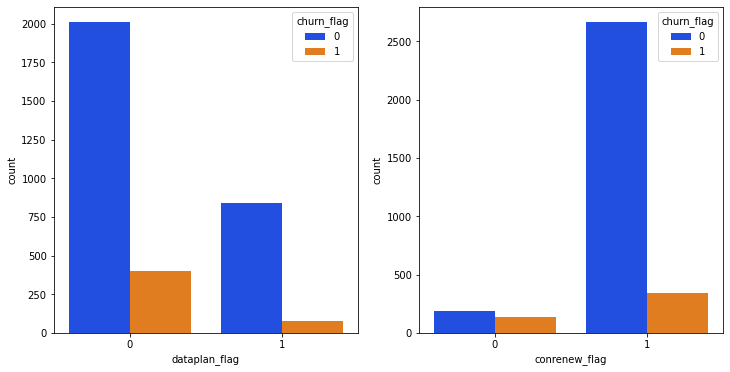

In [93]:
#categorical variables
fig, axarr = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='dataplan_flag', hue = 'churn_flag',data = df1, ax=axarr[0],palette="bright")
sns.countplot(x='conrenew_flag', hue = 'churn_flag',data = df1, ax=axarr[1], palette="bright")


1.Value of churn is higher when the customer has no data plan than the customers who have data plans.<br>
So it might be possible that the customers who dont have data plan and still using data are highly turning churn as they are not aware of the plans and give higher fee<br>
2.Value of churn is higher with the propotion of the customer renewed the plan than the customers who have not renewed the plan.

In [94]:
#copy data
df2=df1.copy()

In [95]:
def piecharts (df2, cat_variables, n_rows=None, n_cols=None, hue="churn_flag"):
    fig=plt.figure(figsize=(20,10))
    explode = (0, 0.1)
    labels=['Churn', 'Not Churn']
    for i, var in enumerate(cat_variables):
        df_0 = [len(df2[(df2[var]==0) & (df2[hue]==1)]), len(df2[(df2[var]==0) & (df2[hue]==0)])]
        
        ax0=fig.add_subplot(n_rows, n_cols, i+1)
        ax0.pie(df_0, explode=explode, labels=labels, autopct='%1.1f%%')
        ax0.set_title("Do not have {}".format(var))
        
    for i, var in enumerate(cat_variables):
        df_1 = [len(df2[(df2[var]!=0) & (df2[hue]==1)]), len(df2[(df2[var]!=0) & (df2[hue]==0)])]
        
        ax1=fig.add_subplot(n_rows, n_cols, i+1+n_rows)
        ax1.pie(df_1, explode=explode, labels=labels, autopct='%1.1f%%')
        ax1.set_title("Have {}".format(var))
    plt.show()

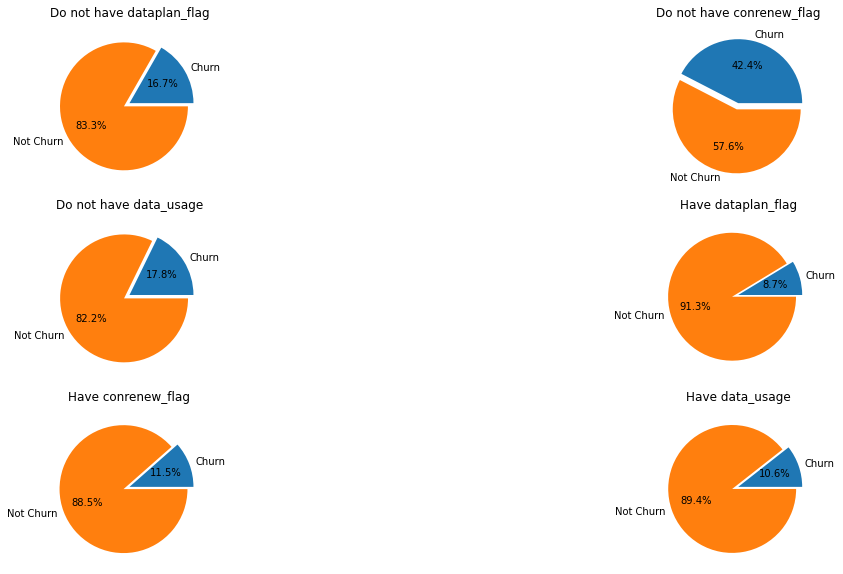

In [96]:
cat_variables = df2[["dataplan_flag", "conrenew_flag", "data_usage"]] 

piecharts(df2, cat_variables,3,2)

Customer where there is no data usage at all has a 7% larger churn rate.<br>
Value of churn is higher when the customer has no data plan than the customers who have data plans.<br>
Value of churn is higher with the propotion of the customer renewed the plan than the customers who have not renewed the plan.

<b>As there are higher value of people who dont have data plan lets focus on it

In [97]:
#Customers who are not using data
no_datausage = (len(df2[df2["data_usage"]==0])/len(df2))*100
#Customers who dont have plan
no_dataplan = (len(df2[df2["dataplan_flag"]==0])/len(df2)) *100
print("The percentage for people with 0 data usage is " + str(round(no_datausage, 2)) + " percent")
print("The percentage for people with no data plan is " + str(round(no_dataplan, 2)) + " percent")

The percentage for people with 0 data usage is 54.4 percent
The percentage for people with no data plan is 72.34 percent


There are approx 22% customers who dont have data plan but are using data.

In [98]:
#Customers who dont have data plan but still uses data
df2["no_dataplan"]=np.where((df2["dataplan_flag"]==0) & (df2["data_usage"]!=0), 1, 0)

Text(0.5, 1.0, 'Customers who used data but did purchase a plan')

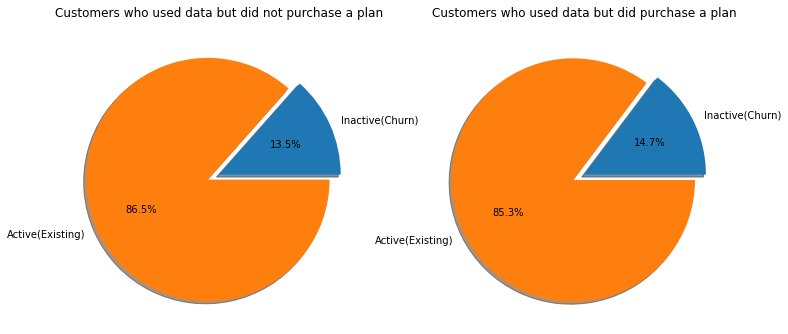

In [99]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
no_dataplan = [len(df2[(df2["no_dataplan"]==1) & (df2["churn_flag"]==1)]), len(df2[(df2["no_dataplan"]==1) & (df2["churn_flag"]==0)])]
ax[0].pie(no_dataplan, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
ax[0].set_title("Customers who used data but did not purchase a plan")

with_dataplan = [len(df2[(df2["no_dataplan"]==0) & (df2["churn_flag"]==1)]), len(df2[(df2["no_dataplan"]==0) & (df2["churn_flag"]==0)])]
ax[1].pie(with_dataplan, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
ax[1].set_title("Customers who used data but did purchase a plan")


There is no conclusion from it so lets drop it.

In [100]:
df2.drop(['no_dataplan'], axis = 1)

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1,0
...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9,0
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6,0
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1,0
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0,0


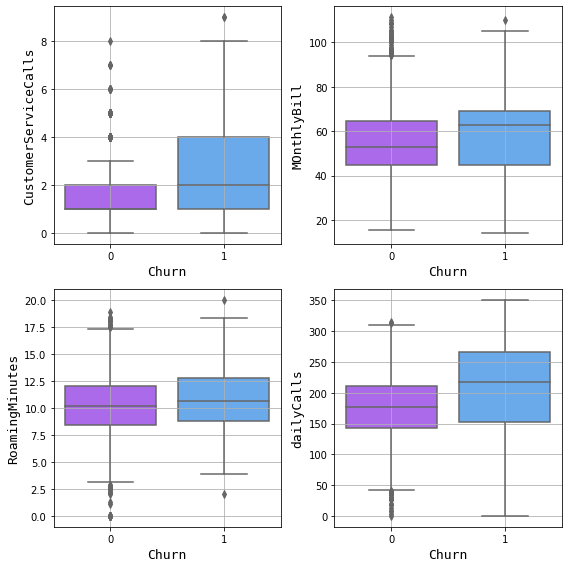

In [101]:
ax = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.boxplot(data = df2 , y = "num_cs_calls" , x = "churn_flag" , palette="cool_r")
plt.grid(True)
plt.xlabel("Churn",size=13, fontweight='light', fontfamily='monospace')
plt.ylabel("CustomerServiceCalls",size=13, fontweight='light', fontfamily='monospace')
plt.subplot(2,2,2)
sns.boxplot(data = df2 , y = "mth_bill" , x = "churn_flag" , palette="cool_r")
plt.grid(True)
plt.xlabel("Churn",size=13, fontweight='light', fontfamily='monospace')
plt.ylabel("MOnthlyBill",size=13, fontweight='light', fontfamily='monospace')
plt.subplot(2,2,3)
sns.boxplot(data = df2 , y = "roam_mins" , x = "churn_flag" , palette="cool_r")
plt.grid(True)
plt.xlabel("Churn",size=13, fontweight='light', fontfamily='monospace')
plt.ylabel("RoamingMinutes",size=13, fontweight='light', fontfamily='monospace')
plt.subplot(2,2,4)
sns.boxplot(data = df2 , y = "avg_talk_time" , x = "churn_flag" , palette="cool_r")
plt.grid(True)
plt.xlabel("Churn",size=13, fontweight='light', fontfamily='monospace')
plt.ylabel("dailyCalls",size=13, fontweight='light', fontfamily='monospace')
plt.tight_layout()
plt.show()


1.75 percent of existing customers have 2 calls to customer service and very few customers have more than 3 calls.<br>
2.Monthly charges are about bit higher for Churn customer.<br>
3.average Roaming minutes are bit high in churn customers.<br>
4.CHurn customers are doing more daily calls than existing customers.

1. Daily Min vs Monthly Charge

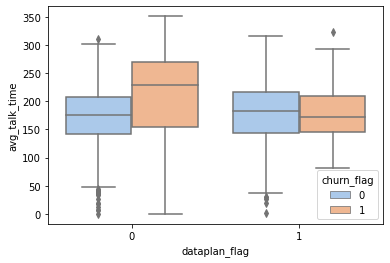

In [102]:
sns.boxplot(x='dataplan_flag', y="avg_talk_time", hue = 'churn_flag', data = df2, palette="pastel")


Customers who did not purchase a data plan and talking time is more are very likely to be churn

2.Data Usage vs Monthly Charge

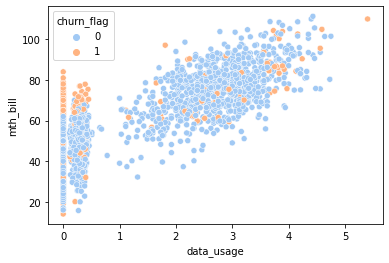

In [103]:
sns.scatterplot(x='data_usage', y="mth_bill", hue = 'churn_flag', data = df2, palette="pastel")

There are two segments of data where customers data usage is beteen 0-1 and above 1.

In [104]:
seg1 = df2.loc[df2["data_usage"]<=1] # Segment1
seg2 = df2.loc[df2["data_usage"]>1] # Segment2

data1=seg1["churn_flag"].value_counts(normalize=True) * 100
data2=seg2["churn_flag"].value_counts(normalize=True) * 100

print("The percentage for people with data usage less than or equal to 1 is " + str(round(data1, 2)) + " percent")
print("The percentage for people with no data usage is " + str(round(data2, 2)) + " percent")

The percentage for people with data usage less than or equal to 1 is 0    83.35
1    16.65
Name: churn_flag, dtype: float64 percent
The percentage for people with no data usage is 0    91.24
1     8.76
Name: churn_flag, dtype: float64 percent


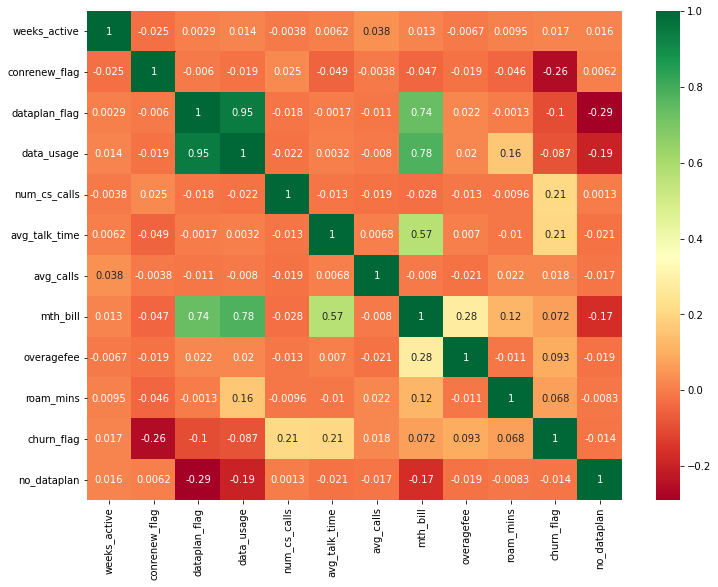

In [105]:
plt.figure(figsize=(12,9))
corrMatrix = df2.corr()
sns.heatmap(corrMatrix, annot=True,cmap='RdYlGn')
plt.show()

1.There is a strong positive correlation with data_usage and dataplan_flag,without a data plan you can't use data.<br>2.Strongest correlation between Usage (dataplan_flag, data_usage, avg_calls) and mth_bill.<br>3.Strong correlation between overagefee and mth_bill.

Concluded:<br>
how can we retain Customers.<br>
1.More Customer Service calls mean the customer is more prone to churn.
2.GIve proper knowledge about data plan to those customers who are using data without data plans.<br>
3.If possible optimising price of data plans can retain customers.

1.	What is the impact on revenue due to customer churn?
2.	Using the below variables, is it possible to find out any indicators that can help reduce churn in future?
•	Whether customer is renewing the contract or not
•	Whether the customer has already made certain number of calls to Customer Care and may be considering an Operator switch
•	When the overage fees charged in the last 12 months exceeds a certain threshold
•	When the monthly bill exceeds a certain amount
3.	Is the Telecom Company losing high value customers or low value customers?
4.	What are the possible reasons for non-renewal of contract?


1.	What is the impact on revenue due to customer churn?


In [106]:
Average_monthly_revenue=df2["mth_bill"].sum()
Average_monthly_revenue

187665.09999999998

In [107]:
Average_fee_revenue=df2["overagefee"].sum()
Average_fee_revenue

33501.61

In [108]:
Total_Revenue=Average_monthly_revenue+Average_fee_revenue

In [109]:
Total_Revenue


221166.70999999996

In [110]:
a=df2.mth_bill[(df2["churn_flag"]==1)].sum()
a

28588.8

In [111]:
b=df2.overagefee[(df2["churn_flag"]==1)].sum()
b

5130.95

In [112]:
Revenue_lost_churn=a+b
Revenue_lost_churn

33719.75

In [113]:
revenue_existing_customers=Total_Revenue-Revenue_lost_churn
revenue_existing_customers

187446.95999999996

In [114]:
((Total_Revenue-revenue_existing_customers)/Total_Revenue)*100

15.246304473218416

There will be an impact of 15% in the next revenue as 2850 will be churned.

Is the Telecom Company losing high value customers or low value customers?

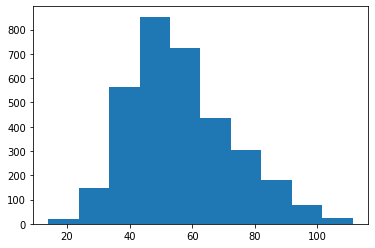

In [115]:
plt.hist(data = df2, x = 'mth_bill');

In [116]:
df2.mth_bill.quantile(0.6)

57.01999999999998

In [117]:
low=df2.query("mth_bill<=57.0199")
high=df2.query("mth_bill>57.0199")

In [118]:
low_value_customers_mth_bill = df2.query('mth_bill<=57.0199 & churn_flag==1')
high_value_customers_mth_bill= df2.query('mth_bill>57.0199  & churn_flag==1')
low_value_existing_customers=df2.query('mth_bill<=57.0199 & churn_flag==0')
high_value_existing_customer=df2.query('mth_bill>57.0199 & churn_flag==0')

In [119]:
low_value_customers_mth_bill

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag,no_dataplan
10,65,1,0,0.29,4,129.1,137,44.9,11.43,12.7,1,1
21,77,1,0,0.00,5,62.4,89,26.0,8.50,5.7,1,0
48,119,1,0,0.00,5,159.1,114,47.0,11.57,8.8,1,0
54,87,1,0,0.00,5,151.0,83,45.0,10.99,9.7,1,0
57,121,1,1,1.57,3,198.4,129,56.7,3.77,5.8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3247,146,1,0,0.00,4,138.4,104,38.0,7.95,3.9,1,0
3280,76,1,0,0.00,4,107.3,140,39.0,11.91,10.0,1,0
3304,71,0,0,0.00,4,186.1,114,49.0,9.93,13.8,1,0
3320,122,0,0,0.30,4,140.0,101,44.0,9.82,9.7,1,1


In [120]:
high_value_customers_mth_bill

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag,no_dataplan
15,161,1,0,0.00,4,332.9,67,84.0,15.89,5.4,1,0
33,12,1,0,0.00,1,249.6,118,64.0,12.62,11.8,1,0
41,135,0,1,3.94,0,173.1,85,86.4,10.20,14.6,1,0
76,82,1,0,0.21,0,300.3,109,69.1,9.05,11.7,1,1
89,128,1,0,0.00,1,237.9,125,62.0,12.38,13.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3272,133,1,0,0.00,2,295.0,141,70.0,11.18,12.9,1,0
3287,170,1,1,2.94,4,199.5,119,75.4,6.75,10.9,1,0
3291,119,0,1,3.75,1,172.1,119,86.5,11.18,13.9,1,0
3301,84,1,0,0.00,0,280.0,113,65.0,10.11,10.4,1,0


In [121]:
high_value_customers_mth_bill.shape[0]

297

In [122]:
low_value_customers_mth_bill.shape[0]

186

high value customers are being churned.

In [123]:
(low_value_customers_mth_bill.shape[0]/low.shape[0])*100

9.3

In [124]:
(high_value_customers_mth_bill.shape[0]/high.shape[0])*100

22.280570142535634

22 percent of high valued customers are churned and 9.3 percent of low valued customers are churned.

Using the below variables, is it possible to find out any indicators that can help reduce churn in future? • Whether customer is renewing the contract or not • Whether the customer has already made certain number of calls to Customer Care and may be considering an Operator switch • When the overage fees charged in the last 12 months exceeds a certain threshold • When the monthly bill exceeds a certain amount

Text(0.5, 1.0, 'Monthly charges by churn')

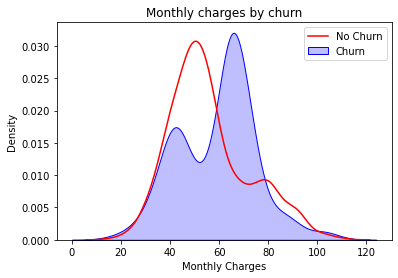

In [125]:
Mth = sns.kdeplot(df2.mth_bill[(df2["churn_flag"] == 0) ],
                color="Red")
Mth = sns.kdeplot(df2.mth_bill[(df2["churn_flag"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

When the monthly charges are approximately above 50% , the customers are prone to churn.

Text(0.5, 1.0, 'overage fee by churn')

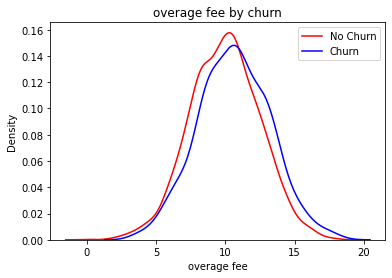

In [130]:
ovg = sns.kdeplot(df2.overagefee[(df2["churn_flag"] == 0) ],
                color="Red")
ovg = sns.kdeplot(df2.overagefee[(df2["churn_flag"] == 1) ],
                ax =ovg, color="Blue")
ovg.legend(["No Churn","Churn"],loc='upper right')
ovg.set_ylabel('Density')
ovg.set_xlabel('overage fee')
ovg.set_title('overage fee by churn')


Text(0.5, 1.0, 'Customer call by churn')

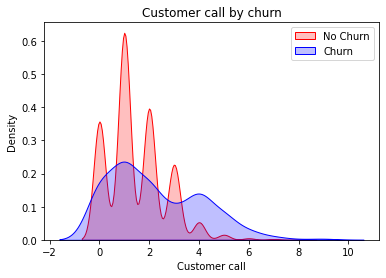

In [127]:
cc = sns.kdeplot(df2.num_cs_calls[(df2["churn_flag"] == 0) ],
                color="Red", shade = True)
cc = sns.kdeplot(df2.num_cs_calls[(df2["churn_flag"] == 1) ],
                ax =cc, color="Blue", shade= True)
cc.legend(["No Churn","Churn"],loc='upper right')
cc.set_ylabel('Density')
cc.set_xlabel('Customer call')
cc.set_title('Customer call by churn')

IndentationError: ignored